In [1]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
os.environ['CUDA_VISIBLE_DEVICES'] = '5'

load the mnist dataset

In [2]:
from keras.datasets import mnist

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:0C:00.0)


In [3]:
(train_data, train_target), (test_data, test_target) = mnist.load_data()

In [4]:
import numpy as np

reduce the number of categories

In [5]:
N=5

In [6]:
train_data = train_data[np.where(train_target<N)[0],...]
train_target = train_target[np.where(train_target<N)]
test_data = test_data[np.where(test_target<N)[0],...]
test_target = test_target[np.where(test_target<N)]

multiple class classification requires softmax and specific output format : a vector of 10 probability

In [7]:
train_target_N = np.zeros((train_target.shape[0], N))
test_target_N = np.zeros((test_target.shape[0], N))
for number in range(N):
    train_target_N[np.where(train_target==number),number] = 1
    test_target_N[np.where(test_target==number),number] = 1

The data to are 28x28 images

In [8]:
print train_data.shape
print train_target.shape

(30596, 28, 28)
(30596,)


In [9]:
print test_data.shape
print test_target.shape

(5139, 28, 28)
(5139,)


`Plot the digits for several of them

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

the target is 0
[ 1.  0.  0.  0.  0.]


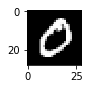

the target is 4
[ 0.  0.  0.  0.  1.]


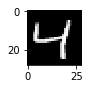

the target is 1
[ 0.  1.  0.  0.  0.]


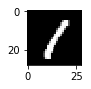

the target is 2
[ 0.  0.  1.  0.  0.]


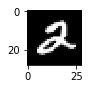

the target is 1
[ 0.  1.  0.  0.  0.]


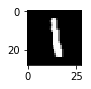

the target is 3
[ 0.  0.  0.  1.  0.]


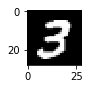

the target is 1
[ 0.  1.  0.  0.  0.]


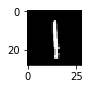

the target is 4
[ 0.  0.  0.  0.  1.]


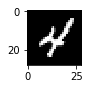

the target is 3
[ 0.  0.  0.  1.  0.]


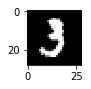

the target is 3
[ 0.  0.  0.  1.  0.]


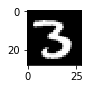

the target is 1
[ 0.  1.  0.  0.  0.]


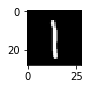

the target is 2
[ 0.  0.  1.  0.  0.]


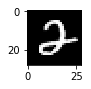

the target is 4
[ 0.  0.  0.  0.  1.]


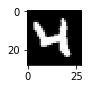

the target is 0
[ 1.  0.  0.  0.  0.]


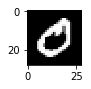

the target is 1
[ 0.  1.  0.  0.  0.]


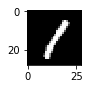

the target is 1
[ 0.  1.  0.  0.  0.]


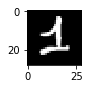

the target is 2
[ 0.  0.  1.  0.  0.]


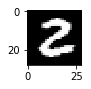

the target is 4
[ 0.  0.  0.  0.  1.]


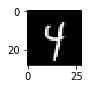

the target is 3
[ 0.  0.  0.  1.  0.]


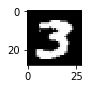

the target is 2
[ 0.  0.  1.  0.  0.]


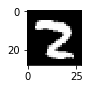

In [11]:
for inum in range( 20):
    plt.figure(figsize=(1,1))
    plt.imshow( train_data[inum,...], cmap='Greys_r' )
    print "the target is",train_target[inum]
    print train_target_N[inum]
    plt.show()

create a simple neural net to train on it

In [12]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Input, Reshape, Conv2D

In [13]:
activation='sigmoid'

In [14]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
simple = Model( i ,o )
simple.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [15]:
simple.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 784)           0           input_1[0][0]                    
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1000)          785000      reshape_1[0][0]                  
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 5)             5005        dense_1[0][0]                    
Total params: 790,005
Trainable params: 790,005
Non-trainable params: 0
___________________

In [16]:
hist = simple.fit( train_data, train_target_N, nb_epoch=40, batch_size=100 ,verbose=1, validation_split=0.2)

Train on 24476 samples, validate on 6120 samples
Epoch 1/40
24476/24476 [==============================] - 0s - loss: 0.1453 - acc: 0.9594 - val_loss: 0.0943 - val_acc: 0.9752
Epoch 2/40
24476/24476 [==============================] - 0s - loss: 0.0916 - acc: 0.9739 - val_loss: 0.0773 - val_acc: 0.9809
Epoch 3/40
24476/24476 [==============================] - 0s - loss: 0.0800 - acc: 0.9780 - val_loss: 0.0733 - val_acc: 0.9792
Epoch 4/40
24476/24476 [==============================] - 0s - loss: 0.0727 - acc: 0.9790 - val_loss: 0.0743 - val_acc: 0.9786
Epoch 5/40
24476/24476 [==============================] - 0s - loss: 0.0722 - acc: 0.9798 - val_loss: 0.0703 - val_acc: 0.9802
Epoch 6/40
24476/24476 [==============================] - 0s - loss: 0.0680 - acc: 0.9801 - val_loss: 0.0673 - val_acc: 0.9797
Epoch 7/40
24476/24476 [==============================] - 0s - loss: 0.0655 - acc: 0.9799 - val_loss: 0.0703 - val_acc: 0.9799
Epoch 8/40
24476/24476 [==============================] - 0s -

In [64]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')
    plt.show()

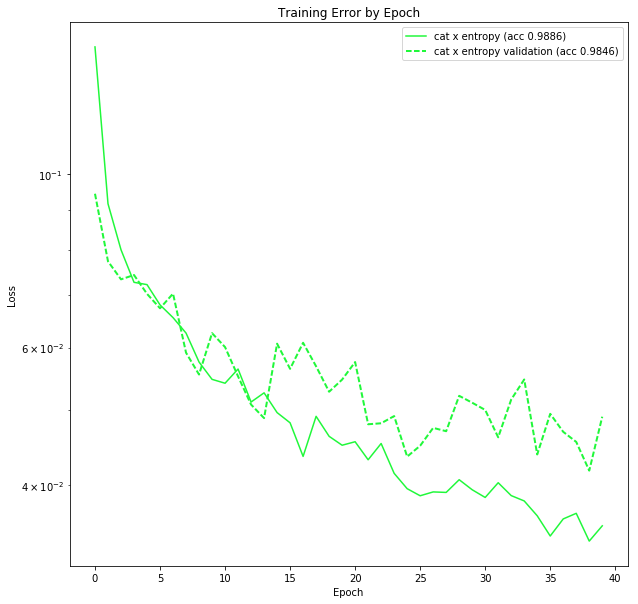

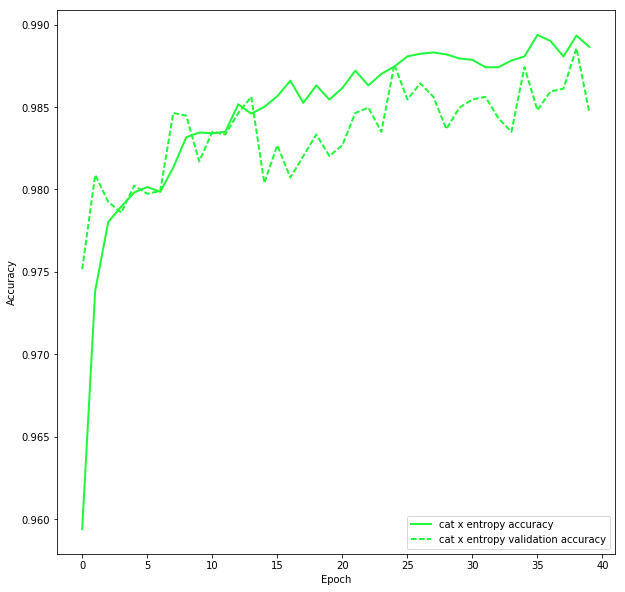

In [18]:
show_losses( [("cat x entropy", hist)])

Choose another loss function

In [19]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
simple_mse = Model( i ,o )
simple_mse.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [20]:
hist_mse = simple_mse.fit( train_data, train_target_N, nb_epoch=40, batch_size=100,verbose=1, validation_split=0.2 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/40
24476/24476 [==============================] - 0s - loss: 0.0147 - acc: 0.9570 - val_loss: 0.0088 - val_acc: 0.9765
Epoch 2/40
24476/24476 [==============================] - 0s - loss: 0.0095 - acc: 0.9723 - val_loss: 0.0082 - val_acc: 0.9765
Epoch 3/40
24476/24476 [==============================] - 0s - loss: 0.0083 - acc: 0.9770 - val_loss: 0.0070 - val_acc: 0.9794
Epoch 4/40
24476/24476 [==============================] - 0s - loss: 0.0079 - acc: 0.9777 - val_loss: 0.0075 - val_acc: 0.9766
Epoch 5/40
24476/24476 [==============================] - 0s - loss: 0.0074 - acc: 0.9793 - val_loss: 0.0066 - val_acc: 0.9820
Epoch 6/40
24476/24476 [==============================] - 0s - loss: 0.0073 - acc: 0.9789 - val_loss: 0.0073 - val_acc: 0.9783
Epoch 7/40
24476/24476 [==============================] - 0s - loss: 0.0070 - acc: 0.9790 - val_loss: 0.0065 - val_acc: 0.9809
Epoch 8/40
24476/24476 [==============================] - 0s -

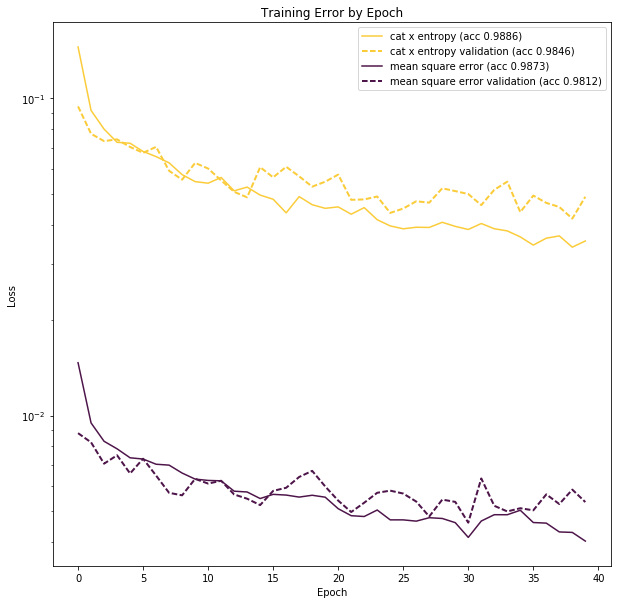

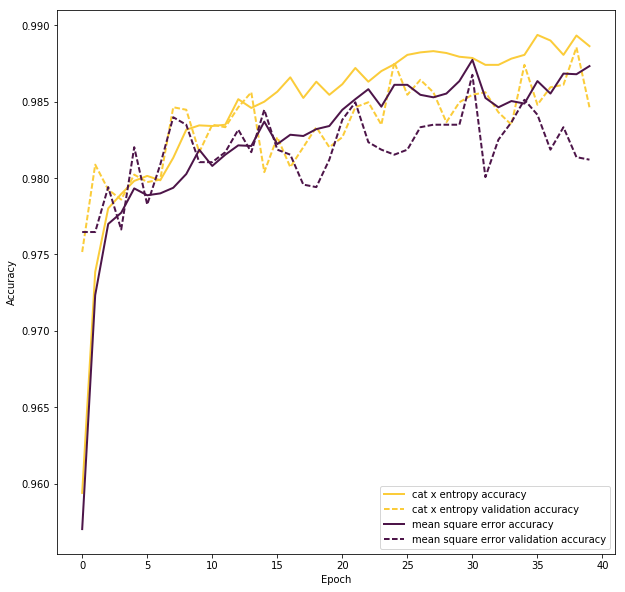

In [21]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse)] )

Loss cannot be compared numerically. Accuracy is not as good, since the MSE is not adapted for the classification problem

Where to stop the training? for how long should it run ?

Add a method to stop training when validation is getting worse

In [22]:
from keras.callbacks import EarlyStopping

add a callback function for checkpointing

In [23]:
from keras.callbacks import ModelCheckpoint

In [ ]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
simple = Model( i ,o )
simple.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = simple.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='simple.h5', verbose=0)]
                 )

In [26]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
simple_mse = Model( i ,o )
simple_mse.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [27]:
hist_mse = simple_mse.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='simple_mse.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 0s - loss: 0.0037 - acc: 0.9884 - val_loss: 0.0042 - val_acc: 0.9858
Epoch 2/1000
24476/24476 [==============================] - 0s - loss: 0.0036 - acc: 0.9886 - val_loss: 0.0043 - val_acc: 0.9873
Epoch 3/1000
24476/24476 [==============================] - 0s - loss: 0.0036 - acc: 0.9889 - val_loss: 0.0051 - val_acc: 0.9833
Epoch 4/1000
24476/24476 [==============================] - 0s - loss: 0.0039 - acc: 0.9876 - val_loss: 0.0048 - val_acc: 0.9851
Epoch 5/1000
24476/24476 [==============================] - 0s - loss: 0.0041 - acc: 0.9872 - val_loss: 0.0055 - val_acc: 0.9825
Epoch 6/1000
24476/24476 [==============================] - 0s - loss: 0.0039 - acc: 0.9879 - val_loss: 0.0048 - val_acc: 0.9851
Epoch 7/1000
24476/24476 [==============================] - 0s - loss: 0.0039 - acc: 0.9872 - val_loss: 0.0050 - val_acc: 0.9843
Epoch 00006: early stopping


plot the training and validation losses

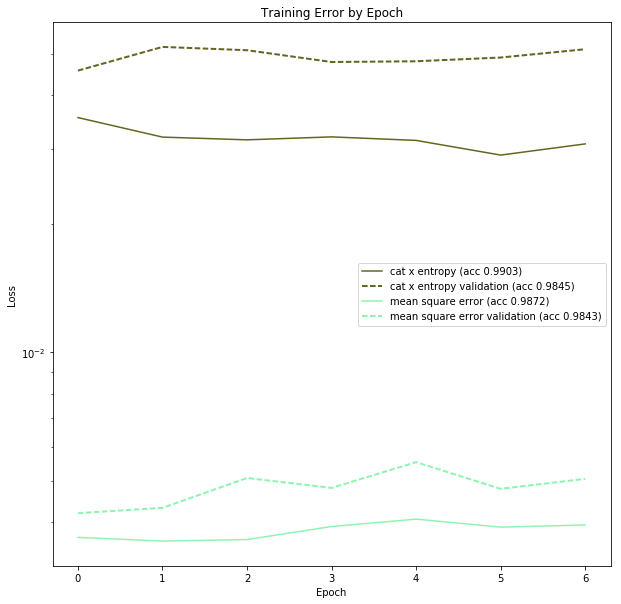

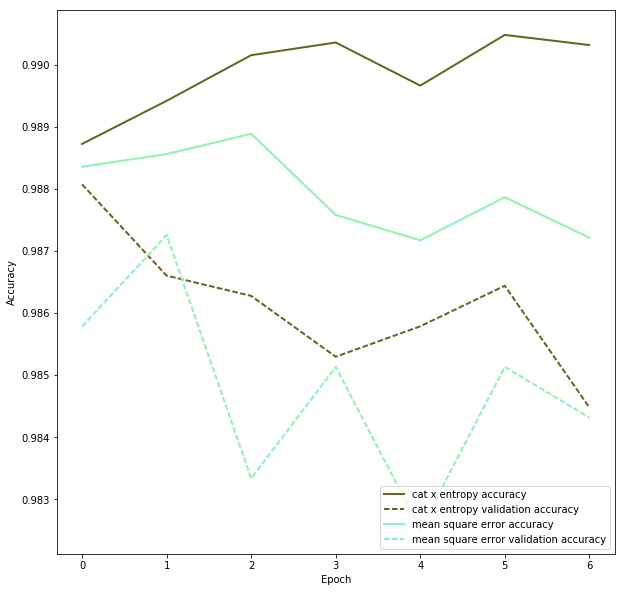

In [28]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse)] )

So which of the two models is perfoming better ?

Let's calculate accuracy 

In [31]:
def accuracy( p ):
    p_cat = np.argmax(p,axis=1)
    print "Fraction of good prediction"
    print len(np.where( p_cat == test_target)[0])
    print len(np.where( p_cat == test_target )[0])/float(len(p_cat)),"%"


In [32]:
accuracy( simple.predict(test_data) )

Fraction of good prediction
5068
0.986184082506 %


In [33]:
accuracy( simple_mse.predict(test_data) )

Fraction of good prediction
5079
0.988324576766 %


Let's keep a deeper network

In [34]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
deeper = Model( i ,o )
deeper.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [35]:
deeper.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_3 (Reshape)              (None, 784)           0           input_3[0][0]                    
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 1000)          785000      reshape_3[0][0]                  
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 1000)          1001000     dense_5[0][0]                    
___________________________________________________________________________________________

In [36]:
hist_deep = deeper.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='deeper.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 0s - loss: 0.1721 - acc: 0.9454 - val_loss: 0.0890 - val_acc: 0.9752
Epoch 2/1000
24476/24476 [==============================] - 0s - loss: 0.0948 - acc: 0.9712 - val_loss: 0.0936 - val_acc: 0.9727
Epoch 3/1000
24476/24476 [==============================] - 0s - loss: 0.0900 - acc: 0.9721 - val_loss: 0.0858 - val_acc: 0.9729
Epoch 4/1000
24476/24476 [==============================] - 0s - loss: 0.0879 - acc: 0.9721 - val_loss: 0.1008 - val_acc: 0.9680
Epoch 5/1000
24476/24476 [==============================] - 0s - loss: 0.0799 - acc: 0.9757 - val_loss: 0.0932 - val_acc: 0.9732
Epoch 6/1000
24476/24476 [==============================] - 0s - loss: 0.0752 - acc: 0.9760 - val_loss: 0.0626 - val_acc: 0.9794
Epoch 7/1000
24476/24476 [==============================] - 0s - loss: 0.0686 - acc: 0.9792 - val_loss: 0.0665 - val_acc: 0.9788
Epoch 8/1000
24476/24476 [======================

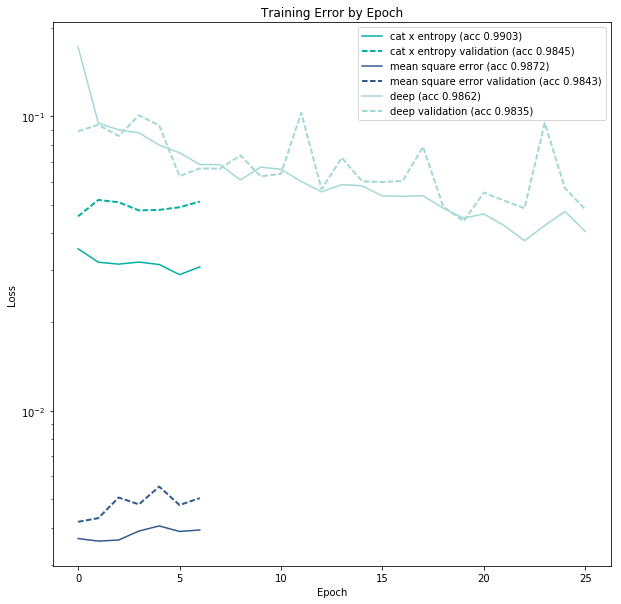

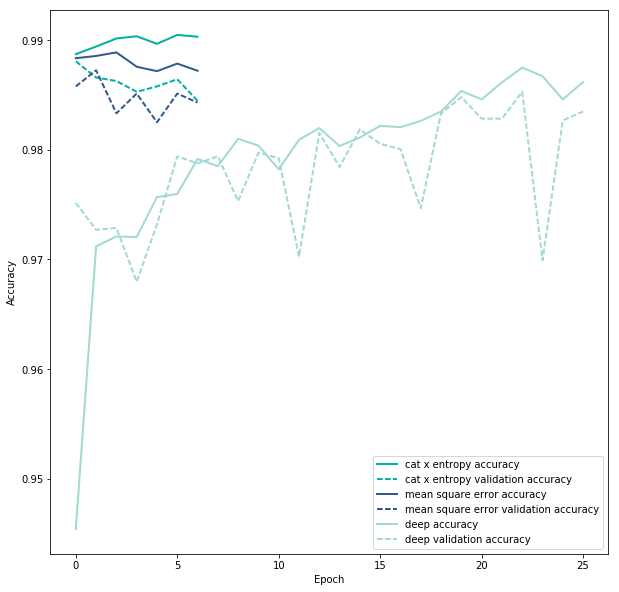

In [37]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse), ("deep", hist_deep)] )

A second layer made it harder to train, and does not provided an priori better performance in the end

In [38]:
accuracy( deeper.predict(test_data) )

Fraction of good prediction
5059
0.984432769021 %


In [39]:
from keras.layers import Dropout

In [40]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation, )(l)
l = Dropout(0.5)(l)
l = Dense(1000, activation=activation)(l)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
deeper_dout = Model( i ,o )
deeper_dout.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [41]:
hist_deepout = deeper_dout.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='deeper_dout.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 0s - loss: 0.2317 - acc: 0.9264 - val_loss: 0.0977 - val_acc: 0.9701
Epoch 2/1000
24476/24476 [==============================] - 0s - loss: 0.1457 - acc: 0.9531 - val_loss: 0.0907 - val_acc: 0.9698
Epoch 3/1000
24476/24476 [==============================] - 0s - loss: 0.1472 - acc: 0.9533 - val_loss: 0.0784 - val_acc: 0.9758
Epoch 4/1000
24476/24476 [==============================] - 0s - loss: 0.1352 - acc: 0.9568 - val_loss: 0.0732 - val_acc: 0.9765
Epoch 5/1000
24476/24476 [==============================] - 0s - loss: 0.1317 - acc: 0.9575 - val_loss: 0.0679 - val_acc: 0.9778
Epoch 6/1000
24476/24476 [==============================] - 0s - loss: 0.1205 - acc: 0.9622 - val_loss: 0.0679 - val_acc: 0.9779
Epoch 7/1000
24476/24476 [==============================] - 0s - loss: 0.1192 - acc: 0.9619 - val_loss: 0.0657 - val_acc: 0.9788
Epoch 8/1000
24476/24476 [======================

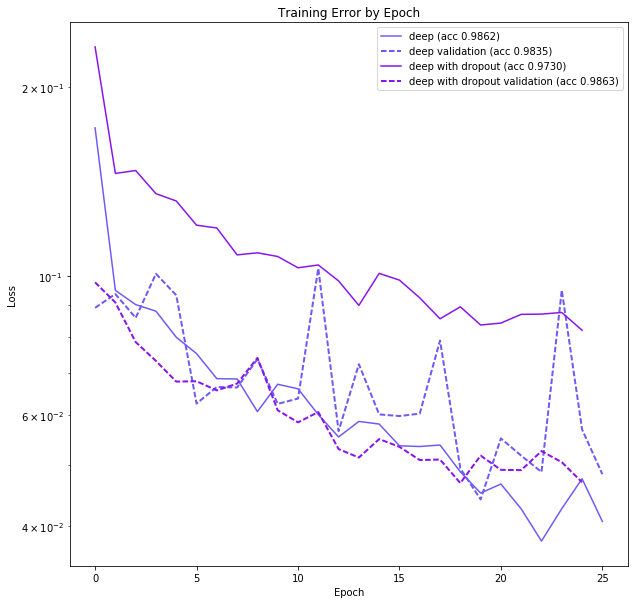

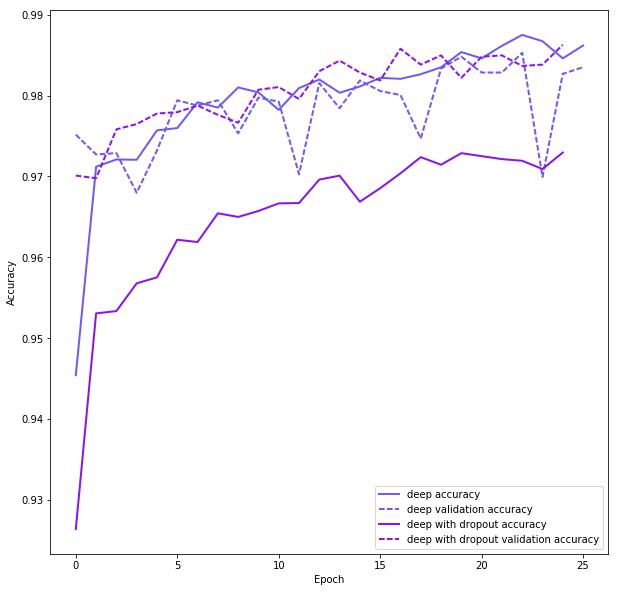

In [42]:
show_losses( [("deep", hist_deep), ("deep with dropout", hist_deepout)] )

In [43]:
accuracy( deeper_dout.predict(test_data) )

Fraction of good prediction
5073
0.987157034442 %


Difference between the train and validation loss/acc is because of nodes being dropped out during training, but not during validation

In [44]:
from keras.layers import Convolution2D, Flatten, MaxPooling2D

In [45]:
i = Input((28,28,))
l = Reshape( (28,28,1))(i)
l = Convolution2D(10, 4, 4, activation=activation, )(l)
l = MaxPooling2D()(l)
l = Flatten()(l)
l = Dense(1000, activation=activation)(l)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
cnn_4 = Model( i ,o )
cnn_4.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [46]:
cnn_4.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_5 (Reshape)              (None, 28, 28, 1)     0           input_5[0][0]                    
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 25, 25, 10)    170         reshape_5[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 10)    0           convolution2d_1[0][0]            
___________________________________________________________________________________________

Note that all parameters are in the dense part of the neural net

In [47]:
hist_cnn_4 = cnn_4.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_4.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 4s - loss: 0.2614 - acc: 0.9193 - val_loss: 0.0835 - val_acc: 0.9761
Epoch 2/1000
24476/24476 [==============================] - 4s - loss: 0.0820 - acc: 0.9750 - val_loss: 0.0553 - val_acc: 0.9806
Epoch 3/1000
24476/24476 [==============================] - 4s - loss: 0.0610 - acc: 0.9812 - val_loss: 0.0388 - val_acc: 0.9887
Epoch 4/1000
24476/24476 [==============================] - 4s - loss: 0.0475 - acc: 0.9855 - val_loss: 0.0355 - val_acc: 0.9887
Epoch 5/1000
24476/24476 [==============================] - 4s - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0351 - val_acc: 0.9899
Epoch 6/1000
24476/24476 [==============================] - 4s - loss: 0.0356 - acc: 0.9887 - val_loss: 0.0327 - val_acc: 0.9895
Epoch 7/1000
24476/24476 [==============================] - 4s - loss: 0.0343 - acc: 0.9887 - val_loss: 0.0258 - val_acc: 0.9918
Epoch 8/1000
24476/24476 [======================

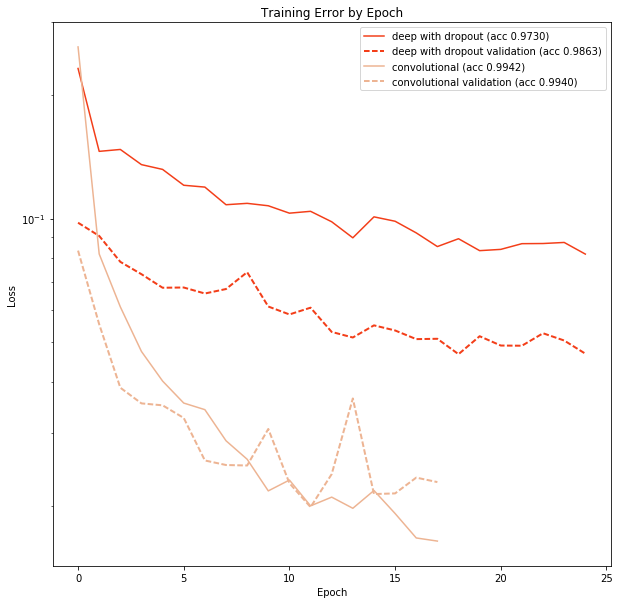

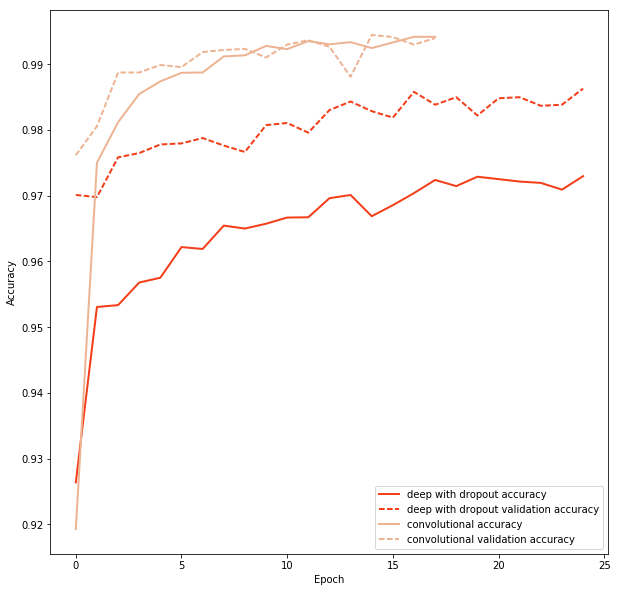

In [48]:
show_losses( [#("mean square error", hist_mse),
              #("deep", hist_deep),
              ("deep with dropout", hist_deepout),
              ("convolutional", hist_cnn_4)] )

Convolutional approach is clearly much better on the problem and the sample we have

In [49]:
accuracy( cnn_4.predict(test_data) )

Fraction of good prediction
5120
0.996302782643 %


In [50]:
i = Input((28,28,))
l = Reshape( (28,28,1))(i)
l = Convolution2D(10, 3, 3, activation=activation, )(l)
l = MaxPooling2D()(l)
l = Flatten()(l)
l = Dense(1000, activation=activation)(l)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
cnn_3 = Model( i ,o )
cnn_3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [51]:
cnn_3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_6 (Reshape)              (None, 28, 28, 1)     0           input_6[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 26, 26, 10)    100         reshape_6[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 13, 13, 10)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [52]:
hist_cnn_3 = cnn_3.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_3.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 4s - loss: 0.3038 - acc: 0.9060 - val_loss: 0.0995 - val_acc: 0.9708
Epoch 2/1000
24476/24476 [==============================] - 4s - loss: 0.1010 - acc: 0.9692 - val_loss: 0.0699 - val_acc: 0.9788
Epoch 3/1000
24476/24476 [==============================] - 4s - loss: 0.0763 - acc: 0.9761 - val_loss: 0.0618 - val_acc: 0.9807
Epoch 4/1000
24476/24476 [==============================] - 4s - loss: 0.0612 - acc: 0.9810 - val_loss: 0.0397 - val_acc: 0.9892
Epoch 5/1000
24476/24476 [==============================] - 4s - loss: 0.0506 - acc: 0.9837 - val_loss: 0.0424 - val_acc: 0.9894
Epoch 6/1000
24476/24476 [==============================] - 4s - loss: 0.0476 - acc: 0.9856 - val_loss: 0.0476 - val_acc: 0.9842
Epoch 7/1000
24476/24476 [==============================] - 4s - loss: 0.0372 - acc: 0.9887 - val_loss: 0.0319 - val_acc: 0.9907
Epoch 8/1000
24476/24476 [======================

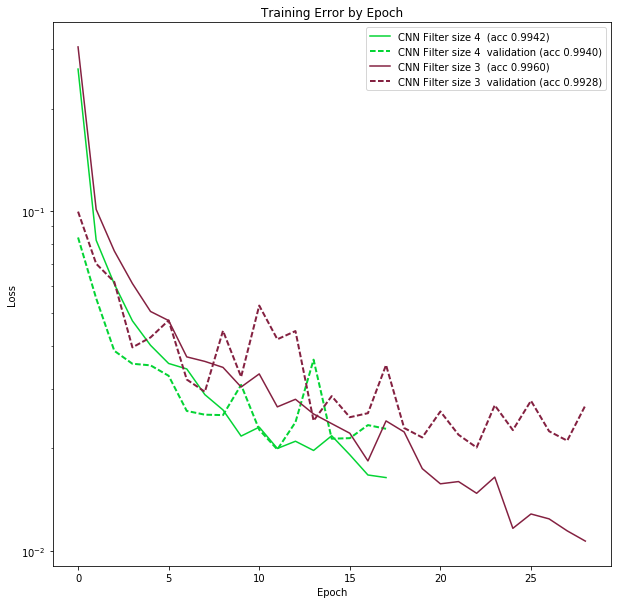

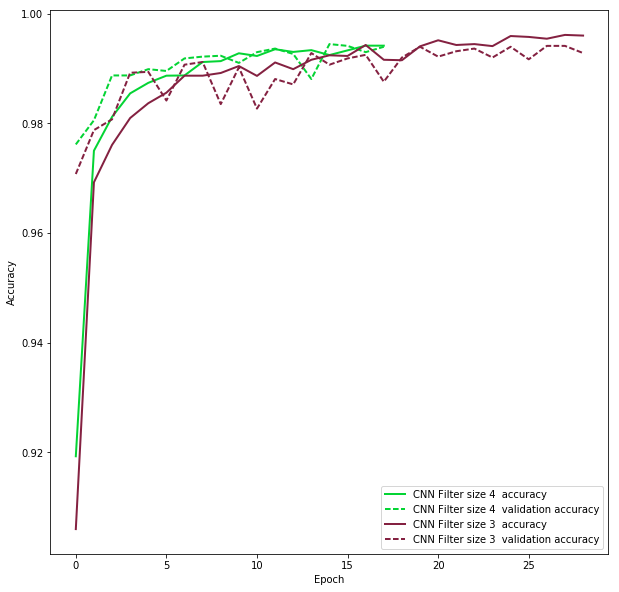

In [53]:
show_losses( [#("mean square error", hist_mse),
              #("deep", hist_deep),
              #("deep with dropout", hist_deepout),
              ("CNN Filter size 4 ", hist_cnn_4),
              ("CNN Filter size 3 ", hist_cnn_3),
] )

In [54]:
i = Input((28,28,))
l = Reshape( (28,28,1))(i)
l = Convolution2D(10, 5, 5, activation=activation, )(l)
l = MaxPooling2D()(l)
l = Flatten()(l)
l = Dense(1000, activation=activation)(l)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
cnn_5 = Model( i ,o )
cnn_5.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [55]:
hist_cnn_5 = cnn_5.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_5.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 3s - loss: 0.2686 - acc: 0.9143 - val_loss: 0.0697 - val_acc: 0.9786
Epoch 2/1000
24476/24476 [==============================] - 3s - loss: 0.0807 - acc: 0.9750 - val_loss: 0.0520 - val_acc: 0.9851
Epoch 3/1000
24476/24476 [==============================] - 3s - loss: 0.0593 - acc: 0.9812 - val_loss: 0.0401 - val_acc: 0.9882
Epoch 4/1000
24476/24476 [==============================] - 3s - loss: 0.0490 - acc: 0.9839 - val_loss: 0.0511 - val_acc: 0.9835
Epoch 5/1000
24476/24476 [==============================] - 3s - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0371 - val_acc: 0.9900
Epoch 6/1000
24476/24476 [==============================] - 3s - loss: 0.0377 - acc: 0.9882 - val_loss: 0.0302 - val_acc: 0.9913
Epoch 7/1000
24476/24476 [==============================] - 3s - loss: 0.0319 - acc: 0.9892 - val_loss: 0.0260 - val_acc: 0.9922
Epoch 8/1000
24476/24476 [======================

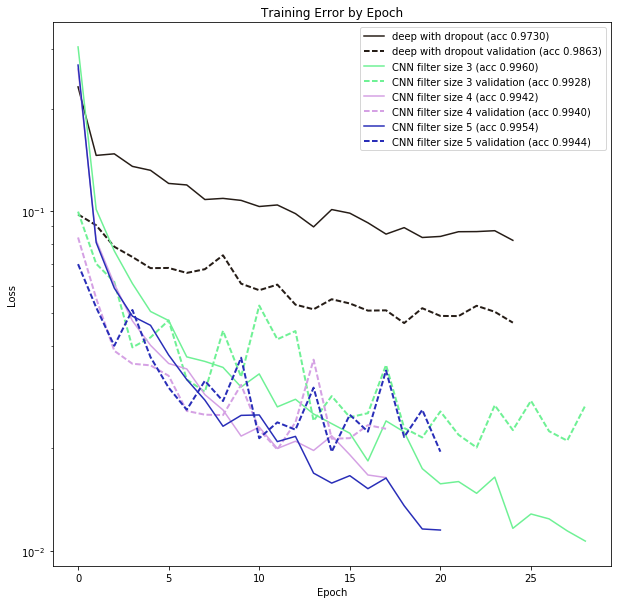

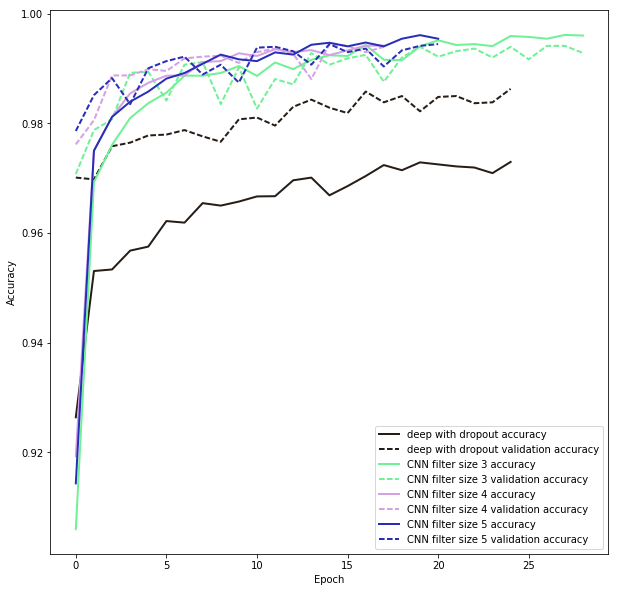

In [56]:
show_losses( [
              #("deep", hist_deep),
        ("deep with dropout", hist_deepout),
                ("CNN filter size 3", hist_cnn_3),
              ("CNN filter size 4", hist_cnn_4),
               ("CNN filter size 5", hist_cnn_5)
            ] )

In [57]:
accuracy( cnn_3.predict(test_data) )
accuracy( cnn_4.predict(test_data) )
accuracy( cnn_5.predict(test_data) )

Fraction of good prediction
5112
0.994746059545 %
Fraction of good prediction
5120
0.996302782643 %
Fraction of good prediction
5119
0.996108192255 %


In [58]:
from keras.layers import Merge, merge

# Let's combine filters of size 3, 4 and 5

In [59]:
i = Input((28,28,))
r = Reshape( (28,28,1))(i)
branches=[]
for s in range(3,6):
    l = Convolution2D(10, s, s, activation=activation, )(r)
    l = MaxPooling2D()(l)
    branches.append( Flatten()(l) )

m = merge(branches, mode='concat')
l = Dense(1000, activation=activation)(m)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
bcnn = Model( i ,o )
bcnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [60]:
bcnn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_8 (Reshape)              (None, 28, 28, 1)     0           input_8[0][0]                    
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 26, 26, 10)    100         reshape_8[0][0]                  
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 25, 25, 10)    170         reshape_8[0][0]                  
___________________________________________________________________________________________

In [61]:
hist_bcnn =bcnn.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='bcnn.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 12s - loss: 0.2699 - acc: 0.9175 - val_loss: 0.0621 - val_acc: 0.9828
Epoch 2/1000
24476/24476 [==============================] - 12s - loss: 0.0782 - acc: 0.9776 - val_loss: 0.0462 - val_acc: 0.9874
Epoch 3/1000
24476/24476 [==============================] - 12s - loss: 0.0587 - acc: 0.9822 - val_loss: 0.0405 - val_acc: 0.9886
Epoch 4/1000
24476/24476 [==============================] - 12s - loss: 0.0456 - acc: 0.9873 - val_loss: 0.0304 - val_acc: 0.9900
Epoch 5/1000
24476/24476 [==============================] - 12s - loss: 0.0414 - acc: 0.9873 - val_loss: 0.0331 - val_acc: 0.9889
Epoch 6/1000
24476/24476 [==============================] - 12s - loss: 0.0383 - acc: 0.9887 - val_loss: 0.0242 - val_acc: 0.9931
Epoch 7/1000
24476/24476 [==============================] - 12s - loss: 0.0356 - acc: 0.9895 - val_loss: 0.0250 - val_acc: 0.9926
Epoch 8/1000
24476/24476 [===============

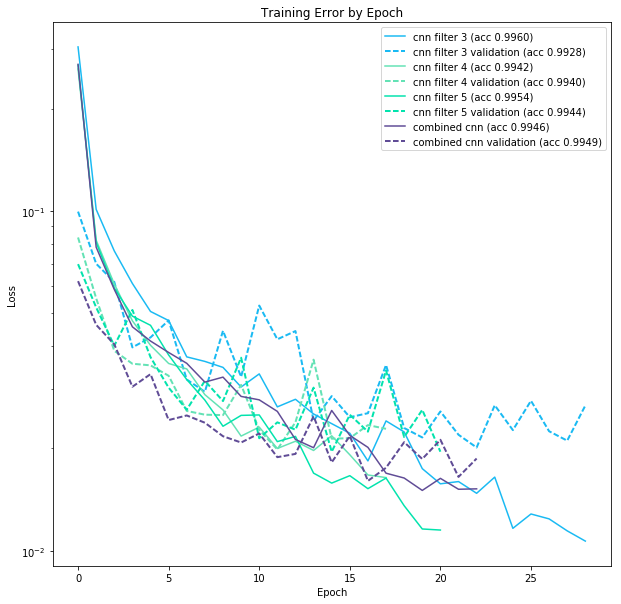

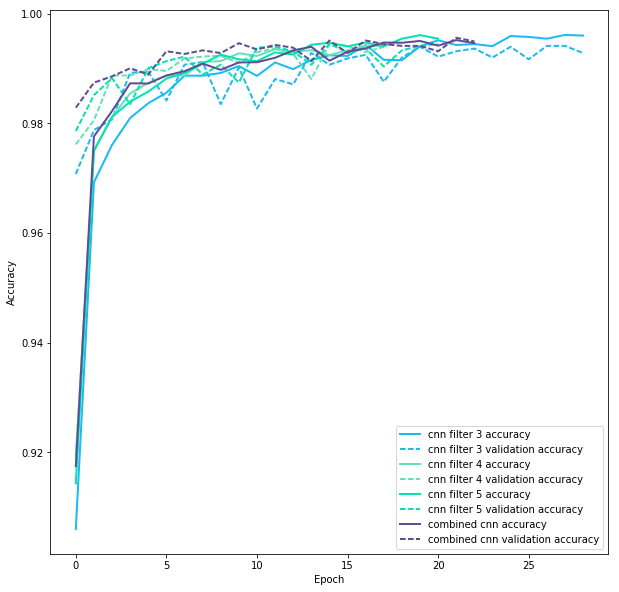

In [62]:
show_losses( [
              #("deep with dropout", hist_deepout),
                ("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               ("cnn filter 5", hist_cnn_5),
             ("combined cnn", hist_bcnn)
            ] )

The combined does not over-perform significantly. Note that the branched model has 5M parameters, all concentrated on the dense part of the model, while the others have <2M

In [65]:
accuracy( bcnn.predict(test_data) )


Fraction of good prediction
5124
0.997081144191 %


Adding a regularizer to constrain the weights on the dense layer

In [83]:
from keras import regularizers

In [88]:
i = Input((28,28,))
r = Reshape( (28,28,1))(i)
branches=[]
for s in range(3,6):
    l = Convolution2D(10, s, s, activation=activation)(r)
    l = MaxPooling2D()(l)
    branches.append( Flatten()(l) )

m = merge(branches, mode='concat')
l = Dense(1000, activation=activation)(m)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax', W_regularizer=regularizers.l2(0.1))(l)
brcnn = Model( i ,o )
brcnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [89]:
brcnn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_18 (InputLayer)            (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_18 (Reshape)             (None, 28, 28, 1)     0           input_18[0][0]                   
____________________________________________________________________________________________________
convolution2d_23 (Convolution2D) (None, 26, 26, 10)    100         reshape_18[0][0]                 
____________________________________________________________________________________________________
convolution2d_24 (Convolution2D) (None, 25, 25, 10)    170         reshape_18[0][0]                 
___________________________________________________________________________________________

In [90]:
hist_brcnn =brcnn.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='brcnn.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 12s - loss: 0.5161 - acc: 0.9177 - val_loss: 0.2231 - val_acc: 0.9786
Epoch 2/1000
24476/24476 [==============================] - 12s - loss: 0.2113 - acc: 0.9775 - val_loss: 0.1767 - val_acc: 0.9856
Epoch 3/1000
24476/24476 [==============================] - 12s - loss: 0.1774 - acc: 0.9836 - val_loss: 0.1580 - val_acc: 0.9889
Epoch 4/1000
24476/24476 [==============================] - 12s - loss: 0.1595 - acc: 0.9878 - val_loss: 0.1470 - val_acc: 0.9900
Epoch 5/1000
24476/24476 [==============================] - 12s - loss: 0.1508 - acc: 0.9890 - val_loss: 0.1472 - val_acc: 0.9892
Epoch 6/1000
24476/24476 [==============================] - 12s - loss: 0.1443 - acc: 0.9906 - val_loss: 0.1479 - val_acc: 0.9882
Epoch 7/1000
24476/24476 [==============================] - 12s - loss: 0.1367 - acc: 0.9921 - val_loss: 0.1292 - val_acc: 0.9931
Epoch 8/1000
24476/24476 [===============

24476/24476 [==============================] - 12s - loss: 0.0775 - acc: 0.9999 - val_loss: 0.0914 - val_acc: 0.9946
Epoch 63/1000
24476/24476 [==============================] - 12s - loss: 0.0772 - acc: 0.9999 - val_loss: 0.0906 - val_acc: 0.9951
Epoch 64/1000
24476/24476 [==============================] - 12s - loss: 0.0772 - acc: 0.9999 - val_loss: 0.0914 - val_acc: 0.9949
Epoch 65/1000
24476/24476 [==============================] - 12s - loss: 0.0765 - acc: 0.9998 - val_loss: 0.0894 - val_acc: 0.9954
Epoch 66/1000
24476/24476 [==============================] - 12s - loss: 0.0761 - acc: 0.9999 - val_loss: 0.0915 - val_acc: 0.9949
Epoch 67/1000
24476/24476 [==============================] - 12s - loss: 0.0761 - acc: 0.9999 - val_loss: 0.0896 - val_acc: 0.9949
Epoch 68/1000
24476/24476 [==============================] - 12s - loss: 0.0762 - acc: 0.9998 - val_loss: 0.0890 - val_acc: 0.9949
Epoch 69/1000
24476/24476 [==============================] - 12s - loss: 0.0751 - acc: 0.9999 - v

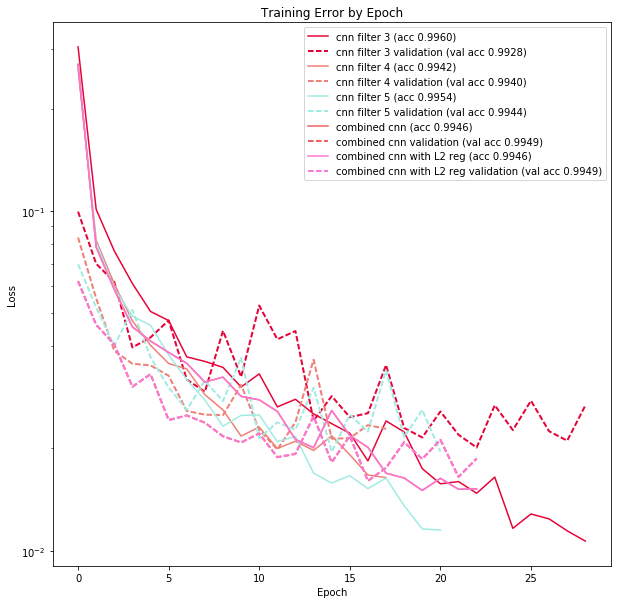

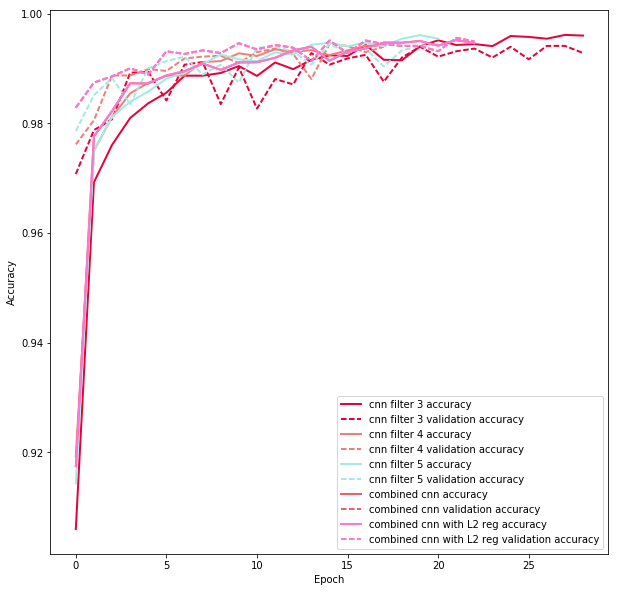

In [91]:
show_losses( [
              #("deep with dropout", hist_deepout),
                ("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               ("cnn filter 5", hist_cnn_5),
             ("combined cnn", hist_bcnn),
            ("combined cnn with L2 reg", hist_bcnn)
            ] )

In [92]:
from keras.layers.normalization import BatchNormalization

In [93]:
i = Input((28,28,))
r = Reshape( (28,28,1))(i)
branches=[]
for s in range(3,6):
    l = Convolution2D(10, s, s, activation=activation, )(r)
    l = BatchNormalization()(l)
    l = MaxPooling2D()(l)
    branches.append( Flatten()(l) )

m = merge(branches, mode='concat')
l = Dense(1000, activation=activation)(m)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
bbncnn = Model( i ,o )
bbncnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [94]:
bbncnn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_19 (InputLayer)            (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_19 (Reshape)             (None, 28, 28, 1)     0           input_19[0][0]                   
____________________________________________________________________________________________________
convolution2d_26 (Convolution2D) (None, 26, 26, 10)    100         reshape_19[0][0]                 
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 25, 25, 10)    170         reshape_19[0][0]                 
___________________________________________________________________________________________

Note that the batch-norm layer has some parameters (4 per feature : gamma, beta, running mean and running std)

In [95]:
hist_bbncnn =bbncnn.fit( train_data, 
                      train_target_N,
                      nb_epoch=1000, 
                      batch_size=100,
                      verbose=1,
                      validation_split=0.2,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                                ModelCheckpoint(filepath='bbncnn.h5', verbose=0)]
                     )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 109s - loss: 0.1039 - acc: 0.9675 - val_loss: 0.0583 - val_acc: 0.9855
Epoch 2/1000
24476/24476 [==============================] - 110s - loss: 0.0337 - acc: 0.9907 - val_loss: 0.0242 - val_acc: 0.9931
Epoch 3/1000
24476/24476 [==============================] - 110s - loss: 0.0207 - acc: 0.9941 - val_loss: 0.0221 - val_acc: 0.9941
Epoch 4/1000
24476/24476 [==============================] - 110s - loss: 0.0143 - acc: 0.9960 - val_loss: 0.0187 - val_acc: 0.9948
Epoch 5/1000
24476/24476 [==============================] - 110s - loss: 0.0105 - acc: 0.9971 - val_loss: 0.0205 - val_acc: 0.9948
Epoch 6/1000
24476/24476 [==============================] - 110s - loss: 0.0087 - acc: 0.9978 - val_loss: 0.0191 - val_acc: 0.9943
Epoch 7/1000
24476/24476 [==============================] - 110s - loss: 0.0076 - acc: 0.9978 - val_loss: 0.0165 - val_acc: 0.9956
Epoch 8/1000
24476/24476 [========

Note that the training time has significantly degraded

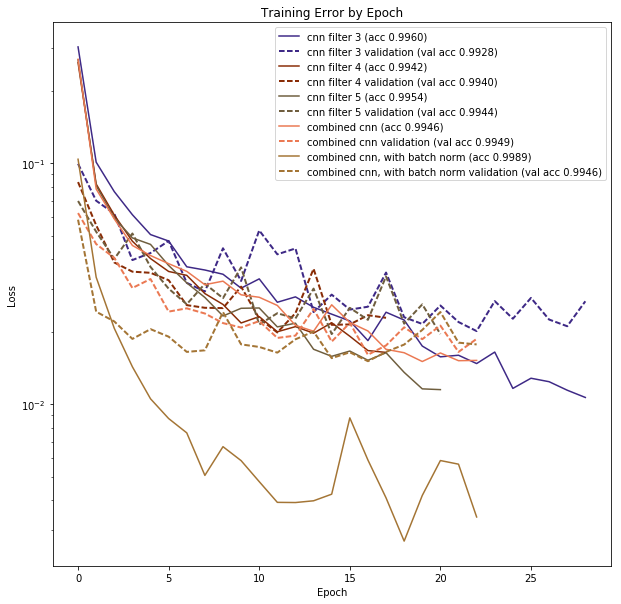

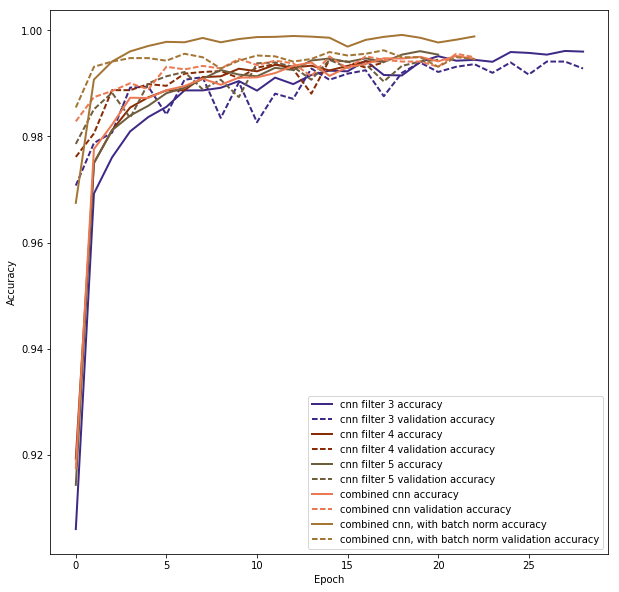

In [96]:
show_losses( [
              #("deep with dropout", hist_deepout),
                ("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               ("cnn filter 5", hist_cnn_5),
             ("combined cnn", hist_bcnn),
    ("combined cnn, with batch norm", hist_bbncnn)
            ] )

# Implement a KFold cross validation for a generic model and select the best model

In [97]:
def metrics(m, x,Y):
    return dict(zip(m.metrics_names,m.evaluate( x, Y )))

In [98]:
def significative( s, precision=2 ):
    std = np.std(s)
    digits = 1
    while (std*10**digits)<(10**(precision-1)): digits+=1
    f = "%%0.%df +/- %%0.%df"%(digits,digits)
    return f%( np.mean(s), std)

In [99]:
from sklearn.cross_validation import  KFold
def cross_val(f_m, X, y, nf, batch_size=1000,nb_epoch=4):
    """
    f_m is a fucntion returning a model with fresh random weights
    """
    scores=[]
    for train, test in KFold(n=X.shape[0], n_folds=nf, shuffle=True, random_state=42):
        model = f_m()
        h=model.fit(X[train], y[train],
                    nb_epoch=nb_epoch,
                    batch_size=batch_size,
                    verbose=0,
                    validation_data =(X[test], y[test]),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')]
              )
        epochs = len(h.history['loss'])
        if epochs == nb_epoch: 
            print "Model has not converged"
            return scores
        print len(h.history['loss']),"epochs to convergence"
        m = metrics(model , X[test], y[test])
        scores.append( m['acc'] )
    print "Found accuracy of ",np.mean(scores),"+/-",np.std(scores)
    return scores

/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [100]:
def make_simple():
    i = Input((28,28,))
    l = Reshape( (28*28,))(i)
    l = Dense(1000, activation=activation)(l)
    o = Dense(N, init='uniform', activation='softmax')(l)
    simple = Model( i ,o )
    simple.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return simple

In [101]:
s_simple = cross_val(make_simple, train_data, train_target_N, nf=10, nb_epoch=100 )

Train on 27536 samples, validate on 3060 samples
Epoch 1/100
27536/27536 [==============================] - 0s - loss: 0.2824 - acc: 0.9039 - val_loss: 0.1074 - val_acc: 0.9693
Epoch 2/100
27536/27536 [==============================] - 0s - loss: 0.0959 - acc: 0.9723 - val_loss: 0.0831 - val_acc: 0.9761
Epoch 3/100
27536/27536 [==============================] - 0s - loss: 0.0759 - acc: 0.9783 - val_loss: 0.0713 - val_acc: 0.9781
Epoch 4/100
27536/27536 [==============================] - 0s - loss: 0.0644 - acc: 0.9824 - val_loss: 0.0625 - val_acc: 0.9830
Epoch 5/100
27536/27536 [==============================] - 0s - loss: 0.0553 - acc: 0.9848 - val_loss: 0.0593 - val_acc: 0.9843
Epoch 6/100
27536/27536 [==============================] - 0s - loss: 0.0506 - acc: 0.9869 - val_loss: 0.0547 - val_acc: 0.9843
Epoch 7/100
27536/27536 [==============================] - 0s - loss: 0.0453 - acc: 0.9883 - val_loss: 0.0507 - val_acc: 0.9856
Epoch 8/100
27536/27536 [==============================

27536/27536 [==============================] - 0s - loss: 0.0123 - acc: 0.9979 - val_loss: 0.0398 - val_acc: 0.9902
Epoch 31/100
27536/27536 [==============================] - 0s - loss: 0.0121 - acc: 0.9981 - val_loss: 0.0418 - val_acc: 0.9859
Epoch 32/100
27536/27536 [==============================] - 0s - loss: 0.0116 - acc: 0.9981 - val_loss: 0.0416 - val_acc: 0.9856
Epoch 33/100
27536/27536 [==============================] - 0s - loss: 0.0112 - acc: 0.9983 - val_loss: 0.0384 - val_acc: 0.9869
Epoch 34/100
27536/27536 [==============================] - 0s - loss: 0.0104 - acc: 0.9983 - val_loss: 0.0377 - val_acc: 0.9873
Epoch 35/100
27536/27536 [==============================] - 0s - loss: 0.0105 - acc: 0.9984 - val_loss: 0.0396 - val_acc: 0.9866
Epoch 36/100
27536/27536 [==============================] - 0s - loss: 0.0101 - acc: 0.9983 - val_loss: 0.0386 - val_acc: 0.9863
Epoch 37/100
27536/27536 [==============================] - 0s - loss: 0.0096 - acc: 0.9985 - val_loss: 0.0364

27536/27536 [==============================] - 0s - loss: 0.0781 - acc: 0.9781 - val_loss: 0.0879 - val_acc: 0.9768
Epoch 4/100
27536/27536 [==============================] - 0s - loss: 0.0664 - acc: 0.9810 - val_loss: 0.0801 - val_acc: 0.9788
Epoch 5/100
27536/27536 [==============================] - 0s - loss: 0.0579 - acc: 0.9843 - val_loss: 0.0750 - val_acc: 0.9791
Epoch 6/100
27536/27536 [==============================] - 0s - loss: 0.0524 - acc: 0.9859 - val_loss: 0.0710 - val_acc: 0.9794
Epoch 7/100
27536/27536 [==============================] - 0s - loss: 0.0465 - acc: 0.9877 - val_loss: 0.0664 - val_acc: 0.9810
Epoch 8/100
27536/27536 [==============================] - 0s - loss: 0.0417 - acc: 0.9893 - val_loss: 0.0629 - val_acc: 0.9817
Epoch 9/100
27536/27536 [==============================] - 0s - loss: 0.0395 - acc: 0.9897 - val_loss: 0.0587 - val_acc: 0.9830
Epoch 10/100
27536/27536 [==============================] - 0s - loss: 0.0354 - acc: 0.9906 - val_loss: 0.0571 - val

27536/27536 [==============================] - 0s - loss: 0.0120 - acc: 0.9980 - val_loss: 0.0388 - val_acc: 0.9843
Epoch 31/100
27536/27536 [==============================] - 0s - loss: 0.0116 - acc: 0.9982 - val_loss: 0.0378 - val_acc: 0.9859
Epoch 32/100
27536/27536 [==============================] - 0s - loss: 0.0113 - acc: 0.9982 - val_loss: 0.0378 - val_acc: 0.9869
Epoch 33/100
27536/27536 [==============================] - 0s - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0375 - val_acc: 0.9856
Epoch 34/100
27536/27536 [==============================] - 0s - loss: 0.0114 - acc: 0.9982 - val_loss: 0.0370 - val_acc: 0.9859
Epoch 35/100
27536/27536 [==============================] - 0s - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0386 - val_acc: 0.9850
Epoch 36/100
27536/27536 [==============================] - 0s - loss: 0.0108 - acc: 0.9981 - val_loss: 0.0400 - val_acc: 0.9856
Epoch 37/100
27536/27536 [==============================] - 0s - loss: 0.0101 - acc: 0.9983 - val_loss: 0.0387

27537/27537 [==============================] - 0s - loss: 0.0223 - acc: 0.9949 - val_loss: 0.0463 - val_acc: 0.9876
Epoch 18/100
27537/27537 [==============================] - 0s - loss: 0.0204 - acc: 0.9955 - val_loss: 0.0412 - val_acc: 0.9882
Epoch 19/100
27537/27537 [==============================] - 0s - loss: 0.0193 - acc: 0.9957 - val_loss: 0.0408 - val_acc: 0.9892
Epoch 20/100
27537/27537 [==============================] - 0s - loss: 0.0192 - acc: 0.9957 - val_loss: 0.0400 - val_acc: 0.9889
Epoch 21/100
27537/27537 [==============================] - 0s - loss: 0.0185 - acc: 0.9962 - val_loss: 0.0422 - val_acc: 0.9869
Epoch 22/100
27537/27537 [==============================] - 0s - loss: 0.0165 - acc: 0.9966 - val_loss: 0.0417 - val_acc: 0.9886
Epoch 23/100
27537/27537 [==============================] - 0s - loss: 0.0156 - acc: 0.9970 - val_loss: 0.0405 - val_acc: 0.9892
Epoch 24/100
27537/27537 [==============================] - 0s - loss: 0.0143 - acc: 0.9975 - val_loss: 0.0421

27537/27537 [==============================] - 0s - loss: 0.1010 - acc: 0.9704 - val_loss: 0.0816 - val_acc: 0.9755
Epoch 3/100
27537/27537 [==============================] - 0s - loss: 0.0797 - acc: 0.9774 - val_loss: 0.0720 - val_acc: 0.9788
Epoch 4/100
27537/27537 [==============================] - 0s - loss: 0.0680 - acc: 0.9816 - val_loss: 0.0635 - val_acc: 0.9794
Epoch 5/100
27537/27537 [==============================] - 0s - loss: 0.0590 - acc: 0.9842 - val_loss: 0.0572 - val_acc: 0.9827
Epoch 6/100
27537/27537 [==============================] - 0s - loss: 0.0535 - acc: 0.9861 - val_loss: 0.0547 - val_acc: 0.9830
Epoch 7/100
27537/27537 [==============================] - 0s - loss: 0.0486 - acc: 0.9870 - val_loss: 0.0490 - val_acc: 0.9850
Epoch 8/100
27537/27537 [==============================] - 0s - loss: 0.0442 - acc: 0.9886 - val_loss: 0.0485 - val_acc: 0.9850
Epoch 9/100
27537/27537 [==============================] - 0s - loss: 0.0407 - acc: 0.9894 - val_loss: 0.0461 - val_

27537/27537 [==============================] - 0s - loss: 0.0178 - acc: 0.9959 - val_loss: 0.0384 - val_acc: 0.9879
Epoch 24/100
27537/27537 [==============================] - 0s - loss: 0.0170 - acc: 0.9959 - val_loss: 0.0359 - val_acc: 0.9873
Epoch 25/100
27537/27537 [==============================] - 0s - loss: 0.0160 - acc: 0.9969 - val_loss: 0.0342 - val_acc: 0.9879
Epoch 26/100
27537/27537 [==============================] - 0s - loss: 0.0153 - acc: 0.9967 - val_loss: 0.0354 - val_acc: 0.9879
Epoch 27/100
27537/27537 [==============================] - 0s - loss: 0.0157 - acc: 0.9968 - val_loss: 0.0364 - val_acc: 0.9879
Epoch 28/100
27537/27537 [==============================] - 0s - loss: 0.0150 - acc: 0.9971 - val_loss: 0.0355 - val_acc: 0.9889
Epoch 29/100
27537/27537 [==============================] - 0s - loss: 0.0148 - acc: 0.9971 - val_loss: 0.0340 - val_acc: 0.9912
Epoch 30/100
27537/27537 [==============================] - 0s - loss: 0.0148 - acc: 0.9969 - val_loss: 0.0313

In [102]:
print "accuracy of %s"%( significative( s_simple ,2))

accuracy of 0.9895 +/- 0.0018


In [103]:
def make_cnn( s ):
    i = Input((28,28,))
    l = Reshape( (28,28,1))(i)
    l = Convolution2D(10, s, s, activation=activation, )(l)
    l = MaxPooling2D()(l)
    l = Flatten()(l)
    l = Dense(1000, activation=activation)(l)
    l = Dropout(0.5)(l)
    o = Dense(N, init='uniform', activation='softmax')(l)
    cnn = Model( i ,o )
    cnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return cnn
def make_cnn_3(): return make_cnn(3)
def make_cnn_4(): return make_cnn(4)
def make_cnn_5(): return make_cnn(5)

In [104]:
s_3 = cross_val(make_cnn_3, train_data, train_target_N, nf=10, nb_epoch=100 )

Train on 27536 samples, validate on 3060 samples
Epoch 1/100
27536/27536 [==============================] - 5s - loss: 1.1618 - acc: 0.6097 - val_loss: 0.4695 - val_acc: 0.9121
Epoch 2/100
27536/27536 [==============================] - 5s - loss: 0.3361 - acc: 0.9136 - val_loss: 0.2217 - val_acc: 0.9458
Epoch 3/100
27536/27536 [==============================] - 5s - loss: 0.2148 - acc: 0.9402 - val_loss: 0.1671 - val_acc: 0.9552
Epoch 4/100
27536/27536 [==============================] - 5s - loss: 0.1731 - acc: 0.9510 - val_loss: 0.1410 - val_acc: 0.9592
Epoch 5/100
27536/27536 [==============================] - 5s - loss: 0.1491 - acc: 0.9575 - val_loss: 0.1261 - val_acc: 0.9631
Epoch 6/100
27536/27536 [==============================] - 5s - loss: 0.1333 - acc: 0.9614 - val_loss: 0.1131 - val_acc: 0.9673
Epoch 7/100
27536/27536 [==============================] - 5s - loss: 0.1206 - acc: 0.9653 - val_loss: 0.1145 - val_acc: 0.9680
Epoch 8/100
27536/27536 [==============================

27536/27536 [==============================] - 5s - loss: 0.1460 - acc: 0.9589 - val_loss: 0.1280 - val_acc: 0.9641
Epoch 5/100
27536/27536 [==============================] - 5s - loss: 0.1263 - acc: 0.9622 - val_loss: 0.1091 - val_acc: 0.9670
Epoch 6/100
27536/27536 [==============================] - 5s - loss: 0.1096 - acc: 0.9676 - val_loss: 0.0943 - val_acc: 0.9716
Epoch 7/100
27536/27536 [==============================] - 5s - loss: 0.0984 - acc: 0.9714 - val_loss: 0.0858 - val_acc: 0.9735
Epoch 8/100
27536/27536 [==============================] - 5s - loss: 0.0894 - acc: 0.9734 - val_loss: 0.0775 - val_acc: 0.9761
Epoch 9/100
27536/27536 [==============================] - 5s - loss: 0.0829 - acc: 0.9769 - val_loss: 0.0767 - val_acc: 0.9765
Epoch 10/100
27536/27536 [==============================] - 5s - loss: 0.0760 - acc: 0.9776 - val_loss: 0.0670 - val_acc: 0.9797
Epoch 11/100
27536/27536 [==============================] - 5s - loss: 0.0709 - acc: 0.9787 - val_loss: 0.0611 - va

27536/27536 [==============================] - 5s - loss: 0.1229 - acc: 0.9659 - val_loss: 0.1172 - val_acc: 0.9676
Epoch 7/100
27536/27536 [==============================] - 5s - loss: 0.1100 - acc: 0.9693 - val_loss: 0.1072 - val_acc: 0.9686
Epoch 8/100
27536/27536 [==============================] - 5s - loss: 0.1000 - acc: 0.9709 - val_loss: 0.0989 - val_acc: 0.9709
Epoch 9/100
27536/27536 [==============================] - 5s - loss: 0.0913 - acc: 0.9747 - val_loss: 0.0940 - val_acc: 0.9729
Epoch 10/100
27536/27536 [==============================] - 5s - loss: 0.0857 - acc: 0.9760 - val_loss: 0.0917 - val_acc: 0.9745
Epoch 11/100
27536/27536 [==============================] - 5s - loss: 0.0786 - acc: 0.9782 - val_loss: 0.0829 - val_acc: 0.9758
Epoch 12/100
27536/27536 [==============================] - 5s - loss: 0.0729 - acc: 0.9792 - val_loss: 0.0805 - val_acc: 0.9771
Epoch 13/100
27536/27536 [==============================] - 5s - loss: 0.0693 - acc: 0.9802 - val_loss: 0.0778 - 

27536/27536 [==============================] - 5s - loss: 0.0716 - acc: 0.9799 - val_loss: 0.0703 - val_acc: 0.9791
Epoch 11/100
27536/27536 [==============================] - 5s - loss: 0.0663 - acc: 0.9803 - val_loss: 0.0660 - val_acc: 0.9797
Epoch 12/100
27536/27536 [==============================] - 5s - loss: 0.0614 - acc: 0.9816 - val_loss: 0.0623 - val_acc: 0.9810
Epoch 13/100
27536/27536 [==============================] - 5s - loss: 0.0562 - acc: 0.9835 - val_loss: 0.0600 - val_acc: 0.9833
Epoch 14/100
27536/27536 [==============================] - 5s - loss: 0.0523 - acc: 0.9850 - val_loss: 0.0580 - val_acc: 0.9824
Epoch 15/100
27536/27536 [==============================] - 5s - loss: 0.0500 - acc: 0.9854 - val_loss: 0.0540 - val_acc: 0.9843
Epoch 16/100
27536/27536 [==============================] - 5s - loss: 0.0479 - acc: 0.9856 - val_loss: 0.0522 - val_acc: 0.9843
Epoch 17/100
27536/27536 [==============================] - 5s - loss: 0.0444 - acc: 0.9870 - val_loss: 0.0546

27536/27536 [==============================] - 5s - loss: 0.0326 - acc: 0.9906 - val_loss: 0.0438 - val_acc: 0.9856
Epoch 26/100
27536/27536 [==============================] - 5s - loss: 0.0312 - acc: 0.9910 - val_loss: 0.0419 - val_acc: 0.9873
Epoch 27/100
27536/27536 [==============================] - 5s - loss: 0.0302 - acc: 0.9913 - val_loss: 0.0451 - val_acc: 0.9859
Epoch 28/100
27536/27536 [==============================] - 5s - loss: 0.0290 - acc: 0.9912 - val_loss: 0.0416 - val_acc: 0.9886
Epoch 29/100
27536/27536 [==============================] - 5s - loss: 0.0290 - acc: 0.9916 - val_loss: 0.0405 - val_acc: 0.9879
Epoch 30/100
27536/27536 [==============================] - 5s - loss: 0.0261 - acc: 0.9925 - val_loss: 0.0390 - val_acc: 0.9876
Epoch 31/100
27536/27536 [==============================] - 5s - loss: 0.0255 - acc: 0.9925 - val_loss: 0.0403 - val_acc: 0.9863
Epoch 32/100
27536/27536 [==============================] - 5s - loss: 0.0253 - acc: 0.9928 - val_loss: 0.0415

27536/27536 [==============================] - 5s - loss: 0.0480 - acc: 0.9856 - val_loss: 0.0489 - val_acc: 0.9853
Epoch 16/100
27536/27536 [==============================] - 5s - loss: 0.0447 - acc: 0.9867 - val_loss: 0.0478 - val_acc: 0.9843
Epoch 17/100
27536/27536 [==============================] - 5s - loss: 0.0421 - acc: 0.9875 - val_loss: 0.0460 - val_acc: 0.9866
Epoch 18/100
27536/27536 [==============================] - 5s - loss: 0.0390 - acc: 0.9888 - val_loss: 0.0471 - val_acc: 0.9843
Epoch 19/100
27536/27536 [==============================] - 5s - loss: 0.0364 - acc: 0.9896 - val_loss: 0.0425 - val_acc: 0.9866
Epoch 20/100
27536/27536 [==============================] - 5s - loss: 0.0340 - acc: 0.9905 - val_loss: 0.0407 - val_acc: 0.9879
Epoch 21/100
27536/27536 [==============================] - 5s - loss: 0.0334 - acc: 0.9903 - val_loss: 0.0396 - val_acc: 0.9873
Epoch 22/100
27536/27536 [==============================] - 5s - loss: 0.0315 - acc: 0.9908 - val_loss: 0.0402

27537/27537 [==============================] - 5s - loss: 0.0285 - acc: 0.9916 - val_loss: 0.0413 - val_acc: 0.9876
Epoch 28/100
27537/27537 [==============================] - 5s - loss: 0.0261 - acc: 0.9921 - val_loss: 0.0375 - val_acc: 0.9882
Epoch 29/100
27537/27537 [==============================] - 5s - loss: 0.0252 - acc: 0.9930 - val_loss: 0.0381 - val_acc: 0.9895
Epoch 30/100
27537/27537 [==============================] - 5s - loss: 0.0233 - acc: 0.9930 - val_loss: 0.0403 - val_acc: 0.9889
Epoch 31/100
27537/27537 [==============================] - 5s - loss: 0.0226 - acc: 0.9937 - val_loss: 0.0385 - val_acc: 0.9889
Epoch 32/100
27537/27537 [==============================] - 5s - loss: 0.0231 - acc: 0.9934 - val_loss: 0.0394 - val_acc: 0.9895
Epoch 33/100
27537/27537 [==============================] - 5s - loss: 0.0229 - acc: 0.9934 - val_loss: 0.0416 - val_acc: 0.9879
Epoch 34/100
27537/27537 [==============================] - 5s - loss: 0.0236 - acc: 0.9929 - val_loss: 0.0372

27537/27537 [==============================] - 5s - loss: 0.0158 - acc: 0.9957 - val_loss: 0.0194 - val_acc: 0.9935
Epoch 44/100
27537/27537 [==============================] - 5s - loss: 0.0174 - acc: 0.9951 - val_loss: 0.0207 - val_acc: 0.9931
Epoch 45/100
27537/27537 [==============================] - 5s - loss: 0.0145 - acc: 0.9963 - val_loss: 0.0209 - val_acc: 0.9935
Epoch 46/100
27537/27537 [==============================] - 5s - loss: 0.0146 - acc: 0.9962 - val_loss: 0.0208 - val_acc: 0.9935
Epoch 47/100
27537/27537 [==============================] - 5s - loss: 0.0131 - acc: 0.9965 - val_loss: 0.0218 - val_acc: 0.9935
Epoch 48/100
27537/27537 [==============================] - 5s - loss: 0.0136 - acc: 0.9963 - val_loss: 0.0225 - val_acc: 0.9931
Epoch 49/100
27537/27537 [==============================] - 5s - loss: 0.0125 - acc: 0.9967 - val_loss: 0.0208 - val_acc: 0.9938
Epoch 00048: early stopping
2912/3059 [===========================>..] - ETA: 0sTrain on 27537 samples, valida

27537/27537 [==============================] - 5s - loss: 0.0110 - acc: 0.9967 - val_loss: 0.0205 - val_acc: 0.9928
Epoch 57/100
27537/27537 [==============================] - 5s - loss: 0.0095 - acc: 0.9973 - val_loss: 0.0197 - val_acc: 0.9938
Epoch 58/100
27537/27537 [==============================] - 5s - loss: 0.0088 - acc: 0.9977 - val_loss: 0.0217 - val_acc: 0.9928
Epoch 59/100
27537/27537 [==============================] - 5s - loss: 0.0082 - acc: 0.9980 - val_loss: 0.0243 - val_acc: 0.9922
Epoch 60/100
27537/27537 [==============================] - 5s - loss: 0.0096 - acc: 0.9970 - val_loss: 0.0230 - val_acc: 0.9925
Epoch 61/100
27537/27537 [==============================] - 5s - loss: 0.0084 - acc: 0.9979 - val_loss: 0.0195 - val_acc: 0.9928
Epoch 62/100
27537/27537 [==============================] - 5s - loss: 0.0071 - acc: 0.9980 - val_loss: 0.0218 - val_acc: 0.9928
Epoch 63/100
27537/27537 [==============================] - 5s - loss: 0.0072 - acc: 0.9979 - val_loss: 0.0194

27537/27537 [==============================] - 5s - loss: 0.0196 - acc: 0.9944 - val_loss: 0.0298 - val_acc: 0.9899
Epoch 50/100
27537/27537 [==============================] - 5s - loss: 0.0179 - acc: 0.9948 - val_loss: 0.0286 - val_acc: 0.9905
Epoch 51/100
27537/27537 [==============================] - 5s - loss: 0.0179 - acc: 0.9948 - val_loss: 0.0253 - val_acc: 0.9912
Epoch 52/100
27537/27537 [==============================] - 5s - loss: 0.0166 - acc: 0.9950 - val_loss: 0.0246 - val_acc: 0.9922
Epoch 53/100
27537/27537 [==============================] - 5s - loss: 0.0163 - acc: 0.9949 - val_loss: 0.0255 - val_acc: 0.9899
Epoch 54/100
27537/27537 [==============================] - 5s - loss: 0.0151 - acc: 0.9957 - val_loss: 0.0247 - val_acc: 0.9908
Epoch 55/100
27537/27537 [==============================] - 5s - loss: 0.0152 - acc: 0.9960 - val_loss: 0.0239 - val_acc: 0.9908
Epoch 56/100
27537/27537 [==============================] - 5s - loss: 0.0138 - acc: 0.9959 - val_loss: 0.0261

In [105]:
s_4 = cross_val(make_cnn_4, train_data, train_target_N, nf=10, nb_epoch=100 )

Train on 27536 samples, validate on 3060 samples
Epoch 1/100
27536/27536 [==============================] - 4s - loss: 0.9257 - acc: 0.6856 - val_loss: 0.3010 - val_acc: 0.9392
Epoch 2/100
27536/27536 [==============================] - 4s - loss: 0.2408 - acc: 0.9375 - val_loss: 0.1634 - val_acc: 0.9601
Epoch 3/100
27536/27536 [==============================] - 4s - loss: 0.1635 - acc: 0.9531 - val_loss: 0.1269 - val_acc: 0.9654
Epoch 4/100
27536/27536 [==============================] - 4s - loss: 0.1300 - acc: 0.9626 - val_loss: 0.1109 - val_acc: 0.9683
Epoch 5/100
27536/27536 [==============================] - 4s - loss: 0.1104 - acc: 0.9675 - val_loss: 0.0898 - val_acc: 0.9755
Epoch 6/100
27536/27536 [==============================] - 4s - loss: 0.0965 - acc: 0.9716 - val_loss: 0.0787 - val_acc: 0.9775
Epoch 7/100
27536/27536 [==============================] - 4s - loss: 0.0860 - acc: 0.9738 - val_loss: 0.0735 - val_acc: 0.9791
Epoch 8/100
27536/27536 [==============================

27536/27536 [==============================] - 4s - loss: 0.0543 - acc: 0.9843 - val_loss: 0.0503 - val_acc: 0.9846
Epoch 14/100
27536/27536 [==============================] - 4s - loss: 0.0508 - acc: 0.9852 - val_loss: 0.0470 - val_acc: 0.9850
Epoch 15/100
27536/27536 [==============================] - 4s - loss: 0.0478 - acc: 0.9865 - val_loss: 0.0446 - val_acc: 0.9859
Epoch 16/100
27536/27536 [==============================] - 4s - loss: 0.0445 - acc: 0.9865 - val_loss: 0.0426 - val_acc: 0.9873
Epoch 17/100
27536/27536 [==============================] - 4s - loss: 0.0419 - acc: 0.9880 - val_loss: 0.0406 - val_acc: 0.9886
Epoch 18/100
27536/27536 [==============================] - 4s - loss: 0.0398 - acc: 0.9891 - val_loss: 0.0384 - val_acc: 0.9879
Epoch 19/100
27536/27536 [==============================] - 4s - loss: 0.0383 - acc: 0.9896 - val_loss: 0.0398 - val_acc: 0.9886
Epoch 20/100
27536/27536 [==============================] - 4s - loss: 0.0367 - acc: 0.9895 - val_loss: 0.0360

2848/3060 [==========================>...] - ETA: 0sTrain on 27536 samples, validate on 3060 samples
Epoch 1/100
27536/27536 [==============================] - 4s - loss: 0.9003 - acc: 0.6992 - val_loss: 0.2588 - val_acc: 0.9392
Epoch 2/100
27536/27536 [==============================] - 4s - loss: 0.2165 - acc: 0.9417 - val_loss: 0.1577 - val_acc: 0.9539
Epoch 3/100
27536/27536 [==============================] - 4s - loss: 0.1481 - acc: 0.9590 - val_loss: 0.1363 - val_acc: 0.9588
Epoch 4/100
27536/27536 [==============================] - 4s - loss: 0.1186 - acc: 0.9658 - val_loss: 0.1050 - val_acc: 0.9663
Epoch 5/100
27536/27536 [==============================] - 4s - loss: 0.0982 - acc: 0.9717 - val_loss: 0.0919 - val_acc: 0.9703
Epoch 6/100
27536/27536 [==============================] - 4s - loss: 0.0839 - acc: 0.9749 - val_loss: 0.0813 - val_acc: 0.9745
Epoch 7/100
27536/27536 [==============================] - 4s - loss: 0.0739 - acc: 0.9786 - val_loss: 0.0761 - val_acc: 0.9765
Epo

27536/27536 [==============================] - 4s - loss: 0.0644 - acc: 0.9814 - val_loss: 0.0626 - val_acc: 0.9840
Epoch 11/100
27536/27536 [==============================] - 4s - loss: 0.0568 - acc: 0.9831 - val_loss: 0.0590 - val_acc: 0.9853
Epoch 12/100
27536/27536 [==============================] - 4s - loss: 0.0552 - acc: 0.9843 - val_loss: 0.0550 - val_acc: 0.9856
Epoch 13/100
27536/27536 [==============================] - 4s - loss: 0.0512 - acc: 0.9847 - val_loss: 0.0527 - val_acc: 0.9866
Epoch 14/100
27536/27536 [==============================] - 4s - loss: 0.0481 - acc: 0.9858 - val_loss: 0.0553 - val_acc: 0.9850
Epoch 15/100
27536/27536 [==============================] - 4s - loss: 0.0439 - acc: 0.9865 - val_loss: 0.0486 - val_acc: 0.9866
Epoch 16/100
27536/27536 [==============================] - 4s - loss: 0.0395 - acc: 0.9884 - val_loss: 0.0455 - val_acc: 0.9869
Epoch 17/100
27536/27536 [==============================] - 4s - loss: 0.0401 - acc: 0.9885 - val_loss: 0.0444

27536/27536 [==============================] - 4s - loss: 0.0287 - acc: 0.9917 - val_loss: 0.0393 - val_acc: 0.9853
Epoch 26/100
27536/27536 [==============================] - 4s - loss: 0.0274 - acc: 0.9923 - val_loss: 0.0406 - val_acc: 0.9859
Epoch 27/100
27536/27536 [==============================] - 4s - loss: 0.0262 - acc: 0.9926 - val_loss: 0.0383 - val_acc: 0.9873
Epoch 28/100
27536/27536 [==============================] - 4s - loss: 0.0254 - acc: 0.9922 - val_loss: 0.0409 - val_acc: 0.9876
Epoch 29/100
27536/27536 [==============================] - 4s - loss: 0.0247 - acc: 0.9927 - val_loss: 0.0354 - val_acc: 0.9882
Epoch 30/100
27536/27536 [==============================] - 4s - loss: 0.0222 - acc: 0.9940 - val_loss: 0.0345 - val_acc: 0.9882
Epoch 31/100
27536/27536 [==============================] - 4s - loss: 0.0211 - acc: 0.9942 - val_loss: 0.0348 - val_acc: 0.9873
Epoch 32/100
27536/27536 [==============================] - 4s - loss: 0.0198 - acc: 0.9943 - val_loss: 0.0353

27537/27537 [==============================] - 4s - loss: 0.1861 - acc: 0.9506 - val_loss: 0.1510 - val_acc: 0.9621
Epoch 4/100
27537/27537 [==============================] - 4s - loss: 0.1520 - acc: 0.9582 - val_loss: 0.1282 - val_acc: 0.9653
Epoch 5/100
27537/27537 [==============================] - 4s - loss: 0.1296 - acc: 0.9629 - val_loss: 0.1117 - val_acc: 0.9703
Epoch 6/100
27537/27537 [==============================] - 4s - loss: 0.1125 - acc: 0.9679 - val_loss: 0.0974 - val_acc: 0.9755
Epoch 7/100
27537/27537 [==============================] - 4s - loss: 0.0993 - acc: 0.9716 - val_loss: 0.0898 - val_acc: 0.9738
Epoch 8/100
27537/27537 [==============================] - 4s - loss: 0.0890 - acc: 0.9741 - val_loss: 0.0814 - val_acc: 0.9781
Epoch 9/100
27537/27537 [==============================] - 4s - loss: 0.0807 - acc: 0.9764 - val_loss: 0.0751 - val_acc: 0.9771
Epoch 10/100
27537/27537 [==============================] - 4s - loss: 0.0745 - acc: 0.9777 - val_loss: 0.0733 - val

27537/27537 [==============================] - 4s - loss: 0.0226 - acc: 0.9939 - val_loss: 0.0238 - val_acc: 0.9928
Epoch 30/100
27537/27537 [==============================] - 4s - loss: 0.0214 - acc: 0.9940 - val_loss: 0.0234 - val_acc: 0.9925
Epoch 31/100
27537/27537 [==============================] - 4s - loss: 0.0218 - acc: 0.9937 - val_loss: 0.0233 - val_acc: 0.9925
Epoch 32/100
27537/27537 [==============================] - 4s - loss: 0.0205 - acc: 0.9940 - val_loss: 0.0253 - val_acc: 0.9922
Epoch 33/100
27537/27537 [==============================] - 4s - loss: 0.0191 - acc: 0.9949 - val_loss: 0.0229 - val_acc: 0.9918
Epoch 34/100
27537/27537 [==============================] - 4s - loss: 0.0195 - acc: 0.9943 - val_loss: 0.0236 - val_acc: 0.9918
Epoch 35/100
27537/27537 [==============================] - 4s - loss: 0.0186 - acc: 0.9947 - val_loss: 0.0247 - val_acc: 0.9912
Epoch 36/100
27537/27537 [==============================] - 4s - loss: 0.0180 - acc: 0.9953 - val_loss: 0.0211

27537/27537 [==============================] - 4s - loss: 0.0181 - acc: 0.9947 - val_loss: 0.0227 - val_acc: 0.9918
Epoch 40/100
27537/27537 [==============================] - 4s - loss: 0.0168 - acc: 0.9954 - val_loss: 0.0211 - val_acc: 0.9935
Epoch 41/100
27537/27537 [==============================] - 4s - loss: 0.0160 - acc: 0.9955 - val_loss: 0.0193 - val_acc: 0.9931
Epoch 42/100
27537/27537 [==============================] - 4s - loss: 0.0157 - acc: 0.9956 - val_loss: 0.0202 - val_acc: 0.9928
Epoch 43/100
27537/27537 [==============================] - 4s - loss: 0.0142 - acc: 0.9961 - val_loss: 0.0190 - val_acc: 0.9935
Epoch 44/100
27537/27537 [==============================] - 4s - loss: 0.0140 - acc: 0.9963 - val_loss: 0.0220 - val_acc: 0.9928
Epoch 45/100
27537/27537 [==============================] - 4s - loss: 0.0133 - acc: 0.9964 - val_loss: 0.0193 - val_acc: 0.9925
Epoch 46/100
27537/27537 [==============================] - 4s - loss: 0.0132 - acc: 0.9966 - val_loss: 0.0182

27537/27537 [==============================] - 4s - loss: 0.0540 - acc: 0.9842 - val_loss: 0.0509 - val_acc: 0.9833
Epoch 12/100
27537/27537 [==============================] - 4s - loss: 0.0512 - acc: 0.9846 - val_loss: 0.0472 - val_acc: 0.9850
Epoch 13/100
27537/27537 [==============================] - 4s - loss: 0.0465 - acc: 0.9862 - val_loss: 0.0450 - val_acc: 0.9853
Epoch 14/100
27537/27537 [==============================] - 4s - loss: 0.0466 - acc: 0.9861 - val_loss: 0.0441 - val_acc: 0.9869
Epoch 15/100
27537/27537 [==============================] - 4s - loss: 0.0424 - acc: 0.9876 - val_loss: 0.0398 - val_acc: 0.9882
Epoch 16/100
27537/27537 [==============================] - 4s - loss: 0.0387 - acc: 0.9889 - val_loss: 0.0395 - val_acc: 0.9882
Epoch 17/100
27537/27537 [==============================] - 4s - loss: 0.0375 - acc: 0.9893 - val_loss: 0.0363 - val_acc: 0.9889
Epoch 18/100
27537/27537 [==============================] - 4s - loss: 0.0358 - acc: 0.9895 - val_loss: 0.0363

In [107]:
print "accuracy of %s"%( significative( s_3 ,2))
print "accuracy of %s"%( significative( s_4 ,2))

accuracy of 0.9914 +/- 0.0012
accuracy of 0.9922 +/- 0.0022


# Exercise

include batch normalization where it makes sense and compare significance in the change

include L2 normalization in dense models to limit the for the large number of parameters

compare network performance by looking at the evolution of acc with the fraction of train_data used

Explore effect of the batch size on model performance, and training time

In [ ]:
evolutions = []
for fract in np.arange(0.5,1,0.1):
    indexing = np.asarray(range(train_data.shape[0]))
    np.random.shuffle( indexing )
    indexing = indexing[:int(fract*len(indexing))]
    evolutions.append( cross_val(make_cnn_3, train_data[indexing], train_target_N[indexing], nf=5, nb_epoch=100 ) )
    print "accuracy of %s"%( significative( evolutions[-1] ,2))

Implement a running average earlystopping class for keras